<a href="https://colab.research.google.com/github/Aymanyah/Stat_app/blob/main/scouting_stat_app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv("all_leagues_merged_transformed.csv")

# Suppression des doublons
df_clean = df.drop_duplicates(subset=['player'])

# (Optionnel) Réinitialiser les index
df_clean = df_clean.reset_index(drop=True)

In [20]:
print(df_clean.shape)
print(df_clean.head())
print(df_clean.info())
print(df_clean.describe(include='all'))

(4208, 44)
        league  season           team              player nation    pos   age  \
0  ITA-Serie A    2020          Genoa     Alberto Paleari    ITA     GK  27.0   
1  ITA-Serie A    2020      Sampdoria     Antonio Palumbo    ITA     MF  23.0   
2  ITA-Serie A    2020         Torino    Antonio Sanabria    PAR     FW  24.0   
3  ITA-Serie A    2020  Hellas Verona       Antonín Barák    CZE     MF  25.0   
4  ITA-Serie A    2020        Bologna  Andreas Skov Olsen    DEN  FW,DF  20.0   

     born  Minutes de jeu  # 90 min jouées  ...  Interceptions  \
0  1992.0             206              2.3  ...       0.000000   
1  1996.0               7              0.1  ...       0.000000   
2  1996.0             978             10.9  ...       0.458716   
3  1994.0            2765             30.7  ...       0.390879   
4  1999.0            1179             13.1  ...       0.229008   

   Tacles réussis + interceptions  Dégagements  \
0                        0.000000     0.434783   
1    

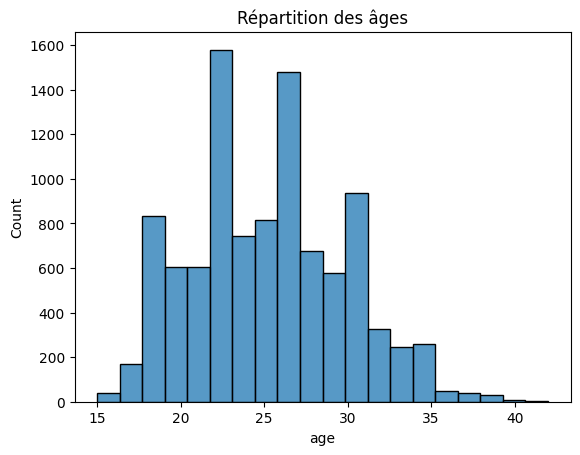

In [16]:
sns.histplot(df['age'], bins=20)
plt.title("Répartition des âges")
plt.show()

In [17]:

goals_cols = [c for c in df.columns if "but" in c.lower()]
print("Colonnes candidates :", goals_cols)

goals_col = goals_cols[0]  # on prend la première
print("Colonne utilisée :", repr(goals_col))

# Filtrer les clubs français
df_fr = df[df["league"].str.startswith("FRA-")]

# Trier
top10 = df_fr.sort_values(goals_col, ascending=False).head(10)

print(top10[["player", "team", goals_col]])

Colonnes candidates : ['Passes menant à un but ']
Colonne utilisée : 'Passes menant à un but '
                    player        team  Passes menant à un but 
8027           Lovro Majer      Rennes                10.000000
6671             Dany Jean  Strasbourg                10.000000
8801         Bilal Brahimi        Nice                10.000000
8800         Bilal Brahimi        Nice                10.000000
8744          Hugo Ekitike   Paris S-G                10.000000
7539  Theocharis Tsingaras    Toulouse                10.000000
7510       Serhou Guirassy      Rennes                 6.666667
8212         Adrien Lebeau       Brest                 6.666667
5997        Ante Palaversa      Troyes                 6.666667
8018         Mamady Bangré    Toulouse                 5.454545


In [18]:
# Nom exact de la colonne des buts
goals_col = "G"

# Filtrer uniquement les clubs français (ligues commençant par "FRA-")
df_clean_fr = df_clean[df_clean["league"].str.startswith("FRA-")]

# Top 10 des buteurs parmi les clubs français
top10 = df_clean_fr.sort_values(goals_col, ascending=False).head(10)

print(top10[["player", "team", goals_col]])

               player         team     G
3751     Nolan Mbemba     Le Havre  4.09
3542      Rhys Healey     Toulouse  2.81
3641     Yuito Suzuki   Strasbourg  2.50
1696     Alexis Flips        Reims  2.09
3780     Oscar Cortés         Lens  2.05
1676  Boubacar Traoré         Metz  1.67
2006   Malik Sellouki         Nice  1.36
2200  Issouf Sissokho     Bordeaux  1.15
3782   Othmane Maamma  Montpellier  1.02
2178    Kylian Mbappé    Paris S-G  1.02


In [19]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful